In [47]:
import keras 
%matplotlib inline

In [36]:
from keras.utils import np_utils
import pandas as pd 
import numpy as np 
import seaborn as sns 
from keras.models import Sequential
from keras.layers.core import Dense,Dropout

In [8]:
data = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 1],
    [7, 7, 1],
    [8, 8, 1],
    [9, 9, 1],
])
data = np.vstack((data,data,data,data))
data = pd.DataFrame(data,columns=['x','y','class'])
data.head(10)

,x,y,class
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,0
4,4,4,0
5,5,5,1
6,6,6,1
7,7,7,1
8,8,8,1
9,9,9,1


In [32]:
X = data.iloc[:,:-1].values # numpy array
y = data.iloc[:,-1:].values

In [37]:
# Get dimensions of input and output
dimof_input = X.shape[1]
dimof_output = np.max(y) + 1
print('dimof_input: ', dimof_input)
print('dimof_output: ', dimof_output)

# Set y categorical
y = np_utils.to_categorical(y, dimof_output)

('dimof_input: ', 2)
('dimof_output: ', 2)


In [41]:
# Set constants
batch_size = 128
dimof_middle = 100
dropout = 0.2
countof_epoch = 100
verbose = 0
print('batch_size: ', batch_size)
print('dimof_middle: ', dimof_middle)
print('dropout: ', dropout)
print('countof_epoch: ', countof_epoch)
print('verbose: ', verbose)


('batch_size: ', 128)
('dimof_middle: ', 100)
('dropout: ', 0.2)
('countof_epoch: ', 100)
('verbose: ', 0)


In [42]:
# Set model
model = Sequential()
model.add(Dense(dimof_middle, input_dim=dimof_input, init='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dimof_middle, init='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dimof_output, init='uniform', activation='softmax'))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


In [44]:
# Train
model.fit(
    X, y,
    validation_split=0.2,
    batch_size=batch_size, nb_epoch=countof_epoch, verbose=verbose)

# Evaluate
loss, accuracy = model.evaluate(X, y, verbose=verbose)
print('loss: ', loss)
print('accuracy: ', accuracy)



('loss: ', 0.21051402390003204)
('accuracy: ', 0.69999999999999996)


In [45]:
print('prediction of [1, 1]: ', model.predict_classes(np.array([[1, 1]]), verbose=verbose))
print('prediction of [8, 8]: ', model.predict_classes(np.array([[8, 8]]), verbose=verbose))

('prediction of [1, 1]: ', array([0]))
('prediction of [8, 8]: ', array([1]))


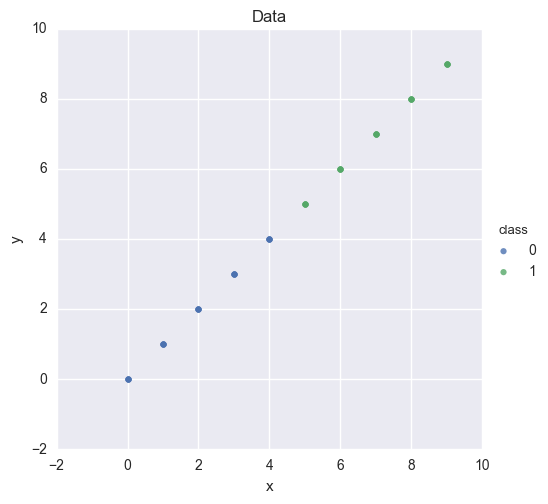

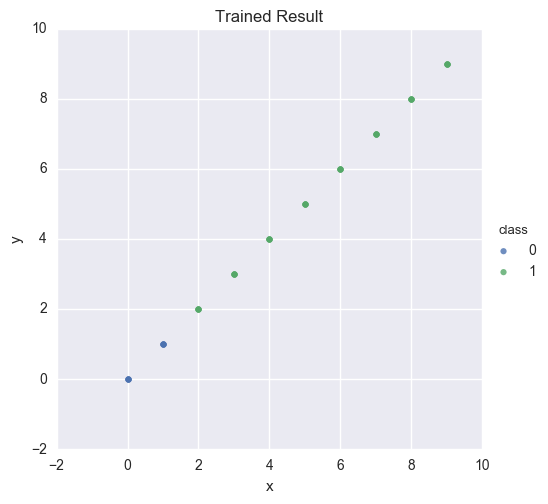

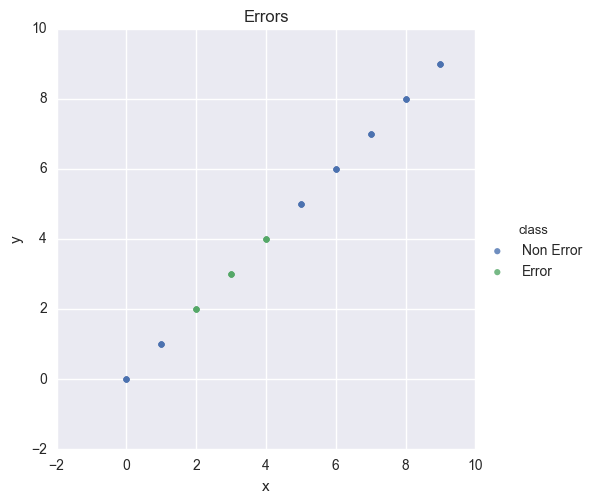

In [48]:
# Plot
sns.lmplot('x', 'y', data, 'class', fit_reg=False).set(title='Data')
data_ = data.copy()
data_['class'] = model.predict_classes(X, verbose=0)
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Trained Result')
data_['class'] = [ 'Error' if is_error else 'Non Error' for is_error in data['class'] != data_['class']]
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Errors')